# Malware Classification with CNN

This notebook aims to build a **Convolutional Neural Network** model to perform a **Multiclass classification** of Malwares from the **Malimg Dataset**. This dataset directly comes from the paper **Malware Images: Visualization and Automatic Classification** from L. Nataraj, S. Karthikeyan, G. Jacob and B. S. Manjunath.
My goal is to give a full tutorial on how to implement their solution, from the preprocessing of malwares to the inference part.

# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Preprocessing - Converting to images

As the **Malimg dataset** already contains images of malwares, I will use another dataset to first show you how to convert our malwares into images, which can be tricky. 
I took as example files from this [dataset](https://www.kaggle.com/c/malware-classification/data?select=train.7z). For each file, the raw data contains the hexadecimal representation of the file's binary content. The goal is to convert those files into PNG images.

Raw malwares will be stored in the following folder:

In [1]:
root = "\Malware_Classification\dataRaw"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

files :  ['0A32eTdBKayjCWhZqDOQ.bytes', '0A32eTdBKayjCWhZqDOQ.bytes.png', '0ACDbR5M3ZhBJajygTuf.bytes', '0ACDbR5M3ZhBJajygTuf.bytes.png']
Processing 0A32eTdBKayjCWhZqDOQ.bytes
Processing 0ACDbR5M3ZhBJajygTuf.bytes


Thanks to this method you are able to create your own malware images dataset !

For computation time I will not process the entire dataset and I will now focus on the **Malming dataset** in which Malwares are already set to images.

Moreover, each Malware image is set into the subfolder corresponding to its class. Thus, when creating your own training images dataset, don't forget to gather Malwares by class into subfolder before executing the next step.

# Preprocessing - Generate the dataset

Here is our new folder :

In [3]:
path_root = "\Malware_Classification\data\malimg_paper_dataset_imgs\\"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : Will resize all images to the specified size. I personally chose (64*64) images.
  * **batch_size** : Is the size of the batch we will use. In our case, we only have 9339 images, hence setting a batch_size above this won't change anything.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Using TensorFlow backend.
D:\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py

Found 9339 images belonging to 25 classes.


We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [5]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [6]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [7]:
imgs.shape

(9339, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [8]:
labels.shape

(9339, 25)

The following method allows us to plot a sample of images in our dataset.

In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

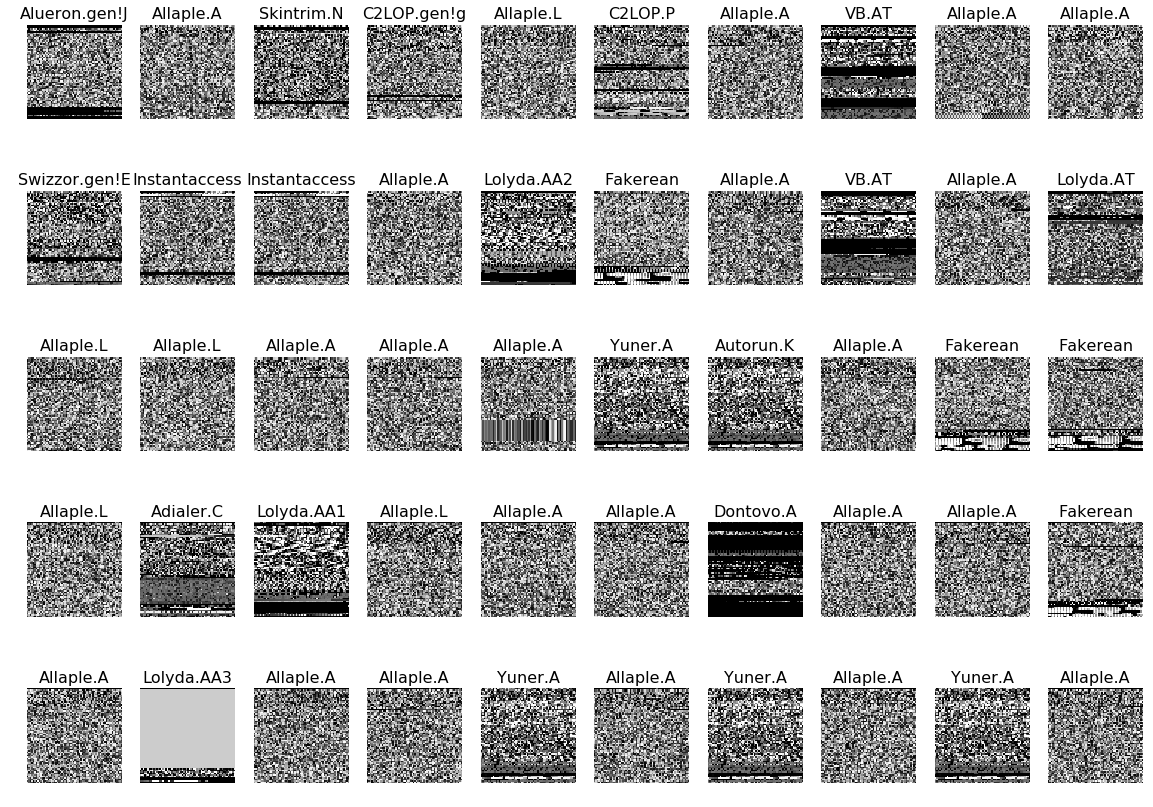

In [10]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse 

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [11]:
classes = batches.class_indices.keys()

In [12]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

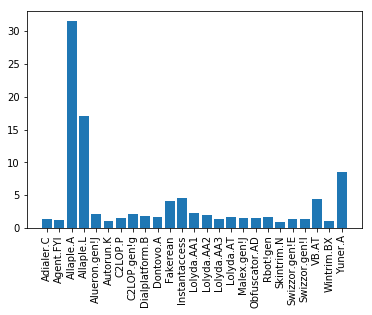

In [13]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !
We will need to deal with that later. 

# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [15]:
X_train.shape

(6537, 64, 64, 3)

In [16]:
X_test.shape

(2802, 64, 64, 3)

In [17]:
y_train.shape

(6537, 25)

In [18]:
y_test.shape

(2802, 25)

## Convolutional Neural Network Model

We will now build our **CNN** model using Keras. This model will have the following layers :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [19]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

We want **25** classes as output.

In [20]:
num_classes = 25

Building the model

In [21]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [22]:
Malware_model = malware_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
Malware_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 15)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2940)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               376448    
__________

Several methods are available to deal with unbalanced data. I our case, I chose to give higher weight to minority class and lower weight to majority class. 

**class_weights** uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. To use this method, y_train must not be one hot encoded.

In [24]:
y_train.shape

(6537, 25)

**class_weight** function cannot deal with one hot encoded y. We need to convert it.

In [25]:
y_train_new = np.argmax(y_train, axis=1)

In [26]:
y_train_new

array([24, 11, 23, ..., 10,  2, 18], dtype=int64)

In [27]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_new),
                                                 y_train_new)

In [28]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,  class_weight=class_weights)

Instructions for updating:
Use tf.cast instead.
Train on 6537 samples, validate on 2802 samples
Epoch 1/10
6537/6537 [==============================] - 97s 15ms/step - loss: 1.6495 - acc: 0.4999 - val_loss: 0.7917 - val_acc: 0.7409
Epoch 2/10
6537/6537 [==============================] - 95s 15ms/step - loss: 0.6894 - acc: 0.7846 - val_loss: 0.3123 - val_acc: 0.9115
Epoch 3/10
6537/6537 [==============================] - 96s 15ms/step - loss: 0.3987 - acc: 0.8704 - val_loss: 0.2241 - val_acc: 0.9261
Epoch 4/10
6537/6537 [==============================] - 93s 14ms/step - loss: 0.2838 - acc: 0.9117 - val_loss: 0.1876 - val_acc: 0.9450
Epoch 5/10
6537/6537 [==============================] - 96s 15ms/step - loss: 0.2290 - acc: 0.9257 - val_loss: 0.1748 - val_acc: 0.9479
Epoch 6/10
6537/6537 [==============================] - 93s 14ms/step - loss: 0.2028 - acc: 0.9338 - val_loss: 0.1494 - val_acc: 0.9582
Epoch 7/10
6537/6537 [==============================] - 74s 11ms/step - loss: 0.1914 - a

In [29]:
scores = Malware_model.evaluate(X_test, y_test)

2802/2802 [==============================] - 21s 7ms/step


We got a 95% accuracy which is not bad !

In [30]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9578872234118487


# Confusion Matrix

Lets analyse our results.

In [31]:
import numpy as np
import pandas as pd

In [32]:
y_pred = Malware_model.predict_classes(X_test, verbose=0)

In [33]:
y_pred

array([ 2,  2, 13, ...,  2,  3,  7], dtype=int64)

In [34]:
y_test2 = np.argmax(y_test, axis=1)

In [35]:
y_test2

array([ 2,  2, 13, ...,  2,  3,  7], dtype=int64)

In [36]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [37]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

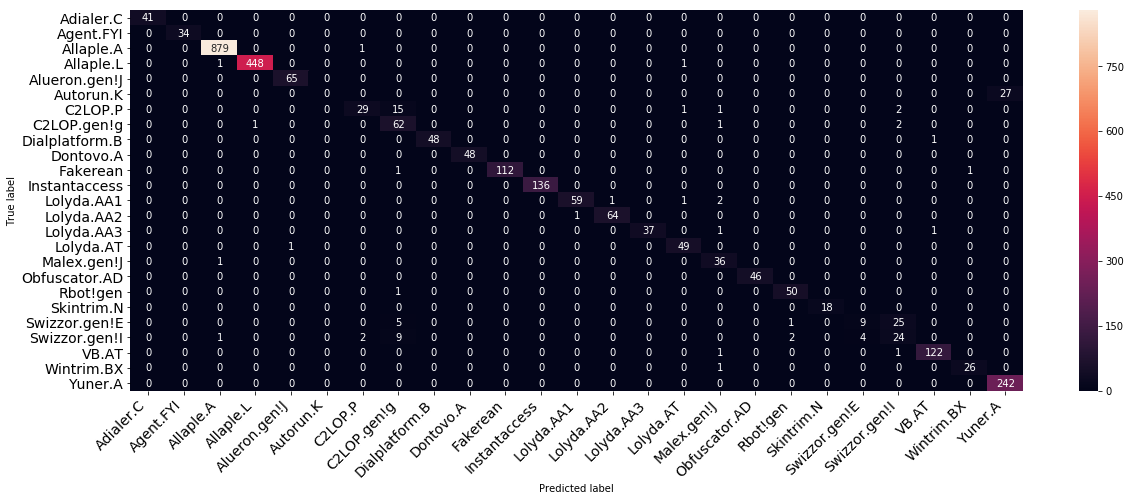

In [38]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.